# P1.5 - prezentacja rozwiązania
Autor: Sławomir Górawski

## Importy

W pliku program.jl zawarte są trzy funkcje, dwie do obliczania wartości ułamka metodami "schodami w górę" i "schodami w dół", jak również funkcja pojedynczego kroku iteracji tej drugiej: stairs_up, stairs_down, stairs_down_iteration_step. Te dwie pierwsze przyjmują wektory $a=[a_1,a_2,\ldots]$ i $b=[b_0,b_1,b_2,\ldots]$. Uwaga: wektor $b$ musi mieć o jeden argument więcej niż $a$.

In [1]:
include("program.jl")
using PyPlot

## Testy

### Testy dokładności
Poniższe funkcję przeprowadzają testy dokładności metod "schodami w górę" i "schodami w dół" w kolejnych iteracjach na różnych precyzjach arytmetyki, biorąc pod uwagę wyliczone wartości oraz błędy bezwzględne. Wyniki przedstawiane są w postaci wykresów, na których niebieskie linie odpowiadają metodzie "schodami w górę", a pomarańczowe - "schodami w dół".

In [2]:
function plot_accuracy(range, su_values_vector, sd_values_vector, expected_value,
                      ϵ_su_vector, ϵ_sd_vector, precision)
    figure(figsize=(10, 3))
    suptitle("Precision: $precision bits")
    
    subplot(121)
    axhline(expected_value, linewidth=0.5, color="g")
    plot(range, su_values_vector, linewidth=1, marker="v")
    plot(range, sd_values_vector, linewidth=1, marker="^")
    xlabel("k")
    ylabel("fraction values")
    
    subplot(122)
    plot(range, ϵ_su_vector, linewidth=1, marker="v")
    plot(range, ϵ_sd_vector, linewidth=1, marker="^")
    xlabel("k")
    ylabel("absolute errors")
    
    tight_layout()
end

function test_accuracy(precisions, range, a_func, b_func, expected_value)
    for precision in precisions
        setprecision(precision) do
            su_values_vector = []
            sd_values_vector = []
            ϵ_su_vector = []
            ϵ_sd_vector = []

            for i=range
                # list comprehensions used to generate sequences a and b
                a = [a_func(k) for k=BigFloat(1):i]
                b = [b_func(k) for k=BigFloat(0):i]

                su = stairs_up(a, b)
                sd = stairs_down(a, b)

                ϵ_su = abs(su - expected_value)
                ϵ_sd = abs(sd - expected_value)

                push!(su_values_vector, su)
                push!(sd_values_vector, sd)
                push!(ϵ_su_vector, ϵ_su)
                push!(ϵ_sd_vector, ϵ_sd)
            end

            plot_accuracy(range, su_values_vector, sd_values_vector, expected_value,
                         ϵ_su_vector, ϵ_sd_vector, precision)
        end
    end
end

test_accuracy (generic function with 1 method)

### Testy szybkości
Poniższe funkcje przeprowadzają pomiary czasu zużywanego przez metody "schodami w górę", "schodami w dół" oraz "schodami w dół", ale z dynamicznym wyliczaniem kolejnych wyników bazując na poprzednich przy użyciu funkcji kroku iteracji. Wyniki przedstawione są na wykresie, gdzie wyżej wymienione funkcje oznaczone są kolorami odpowiednio: niebieskim, pomarańczowym i zielonym.

In [3]:
function plot_time(range, su_time_vector, sd_time_vector, sd_its_time_vector)
    plot(range, su_time_vector, label="Stairs up")
    plot(range, sd_time_vector, label="Stairs down")
    plot(range, sd_its_time_vector, label="Stairs down iterative")
    xlabel("k")
    ylabel("time [s]")
    title("Time measurement results")
    legend()
end

function test_time(range, a_func, b_func)
    # Important! Use range with step 1 for this test!
    setprecision(64) do
        su_time_vector = []
        sd_time_vector = []
        sd_its_time_vector = []
        
        # stairs_down iteration step initial values
        p_previous = 1
        p_current = b_func(1)
        q_previous = 0
        q_current = 1

        for i=range
            # list comprehensions used to generate sequences a and b
            a = [a_func(k) for k=BigFloat(1):i]
            b = [b_func(k) for k=BigFloat(0):i]
            
            # stairs_up time test
            mark = time()
            stairs_up(a, b)
            su_time = time() - mark
            
            # stairs_down time test
            mark = time()
            stairs_down(a, b)
            sd_time = time() - mark
            
            # stairs_down iteration step time test
            mark = time()
            (p_next, q_next) = stairs_down_iteration_step(a[end], b[end],
                                                      p_previous,
                                                      p_current,
                                                      q_previous,
                                                      q_current)
            p_previous = p_current
            p_current = p_next
            q_previous = q_current
            q_current = q_next
            sd_its_time = time() - mark
            
            #saving results
            push!(su_time_vector, su_time)
            push!(sd_time_vector, sd_time)
            push!(sd_its_time_vector, sd_its_time)
        end
        
        plot_time(range, su_time_vector, sd_time_vector, sd_its_time_vector)
    end
end

test_time (generic function with 1 method)

## Przykłady

W poniższych przykładach zaprezentowane są wartości ułamków łańcuchowych dla kolejnych $k$ - co odpowiada coraz dokładniejszym danym wejściowym - w odniesieniu do wartosci, którą mają z założenia przybliżać (przedstawionej w postaci poziomej linii na wykresie). Niebieskim liniom na wykresach odpowiadają wartości obliczone metodą "schodami w górę", zaś pomarańczowym - "schodami w dół".

### 1. b) i
Założenie: przybliżanie wartości $\displaystyle\frac{\pi}{4}$

$$a_1=1,\ a_2=1,\ a_3=9,\ a_4=25,\ a_5=49,\ldots,\ a_k=(2k-3)^2$$
$$b_0=0,\ b_1=1,\ldots,\ b_k=min(2, k)$$

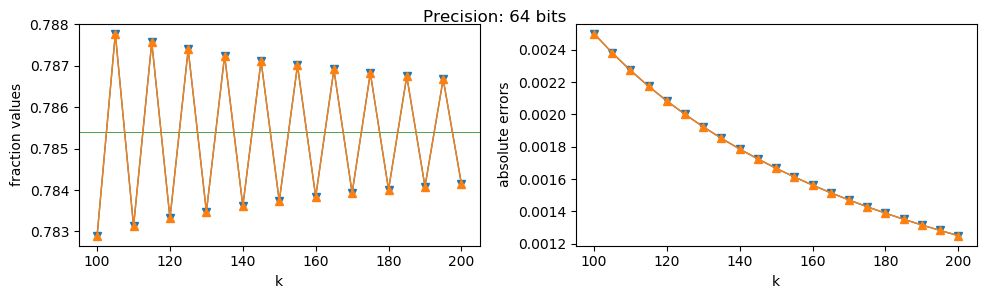

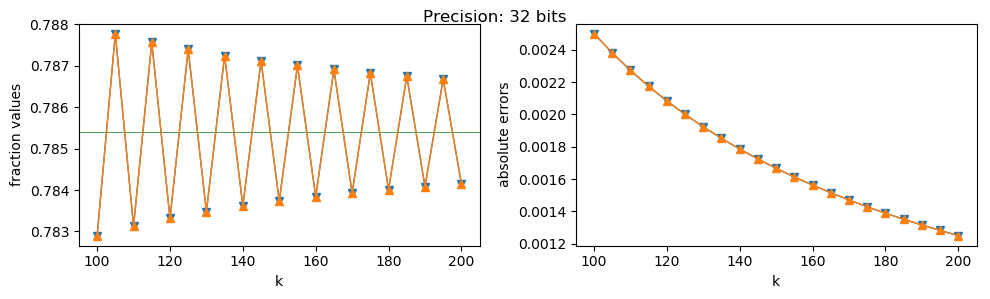

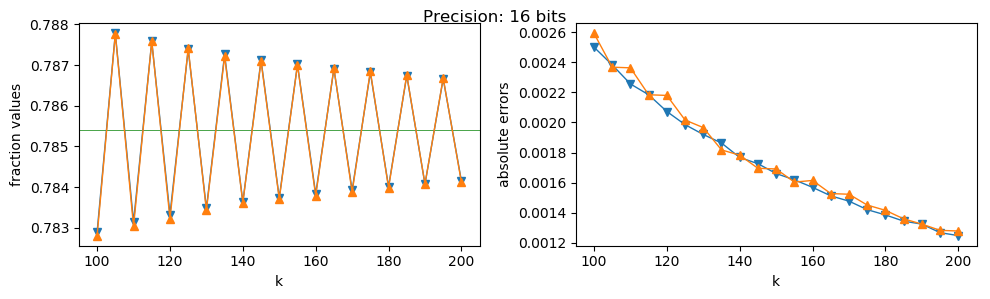

In [7]:
test_accuracy([64, 32, 16], 100:5:200, k -> (2 * k - 3)^2, k -> min(2, k), pi / 4)

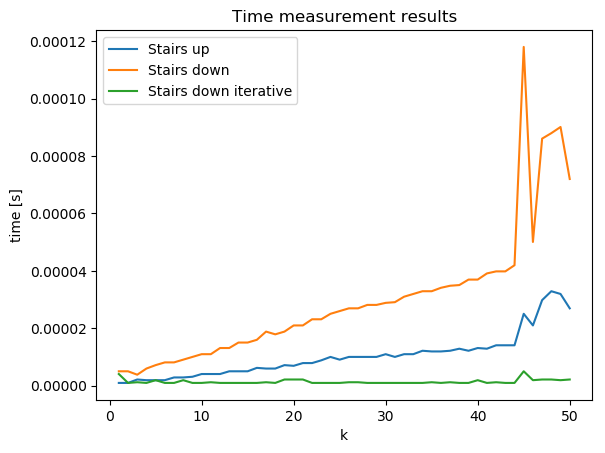

PyObject <matplotlib.legend.Legend object at 0x1310536d0>

In [11]:
test_time(1:50, k -> (2 * k - 3)^2, k -> min(2, k))

### 2. b) ii
Założenie: przybliżanie wartości $e$

$$b_0=2,\ a_k=b_k=k+1\ (k\geq1)$$

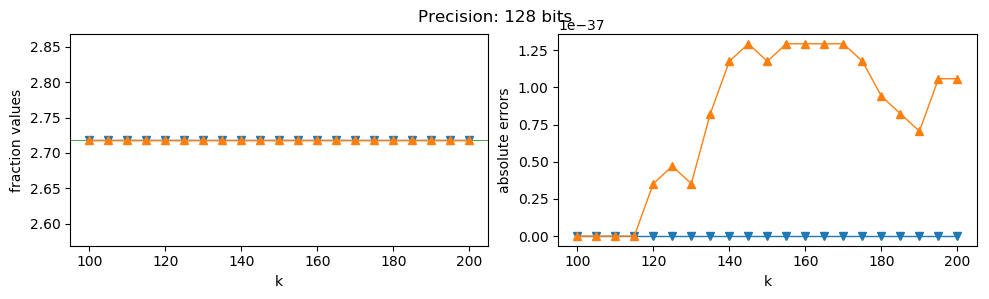

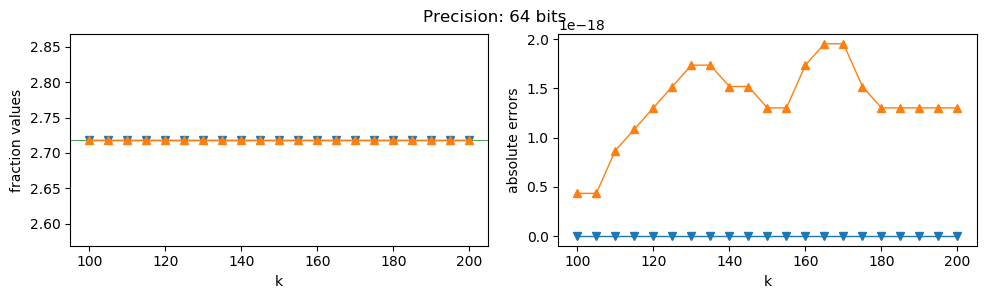

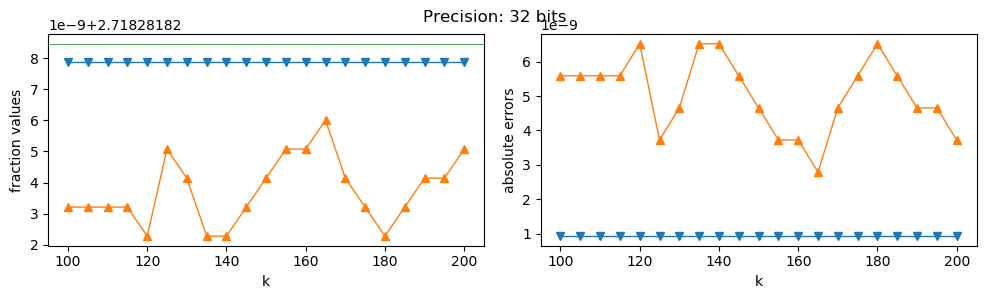

In [12]:
test_accuracy([128, 64, 32], 100:5:200, k -> k + 1, k -> max(2, k + 1), e)

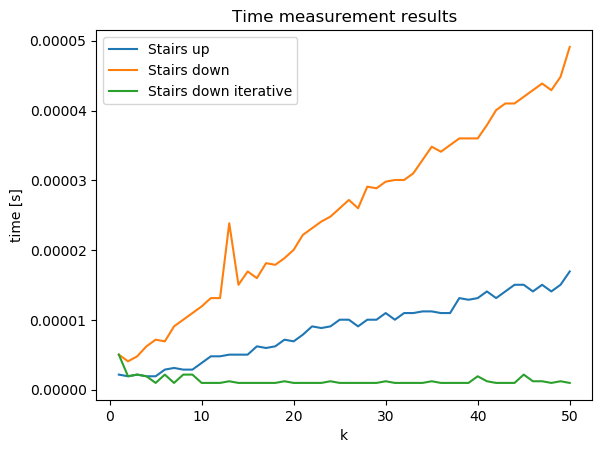

PyObject <matplotlib.legend.Legend object at 0x12d806d50>

In [32]:
test_time(1:50, k -> k + 1, k -> max(2, k + 1))

### 3. Pierwiastek
Założenie: przybliżanie wartości $\sqrt{2}$

$$b_0=1,\ a_k=1,\ b_k=2\ (k\geq1)$$

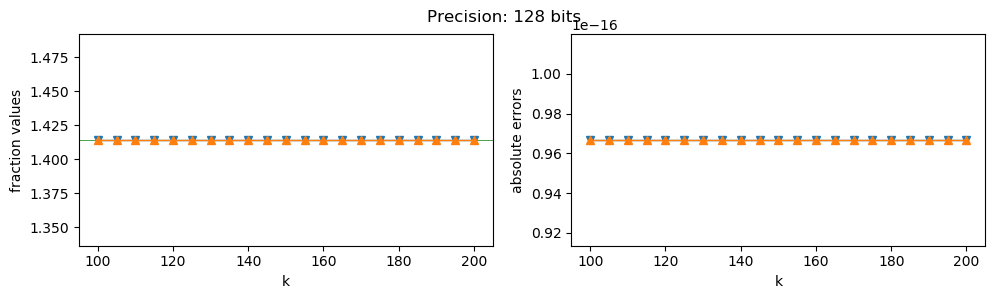

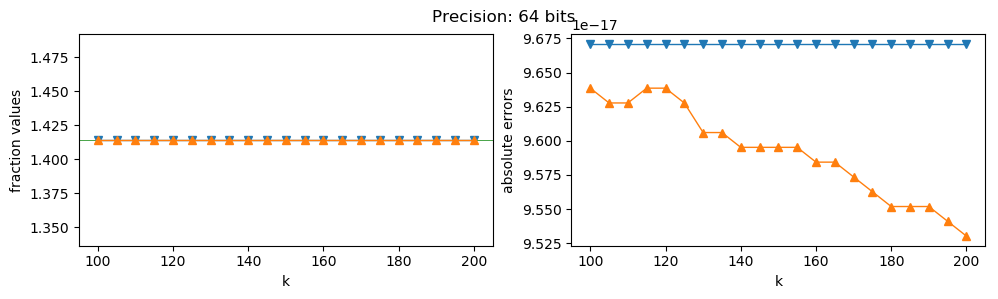

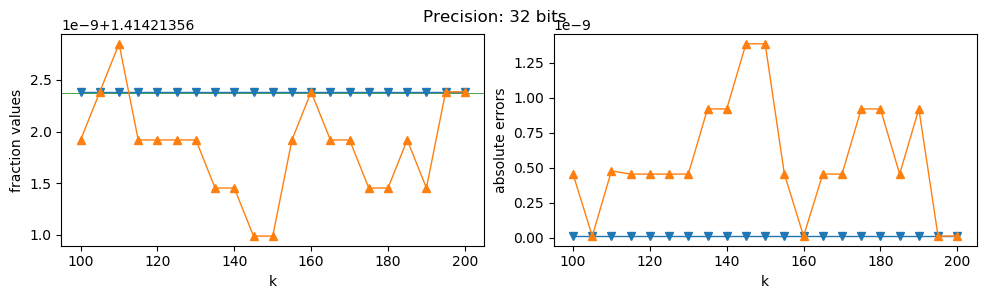

In [21]:
test_accuracy([128, 64, 32], 100:5:200, k -> 1, k-> min(k + 1, 2), sqrt(2))

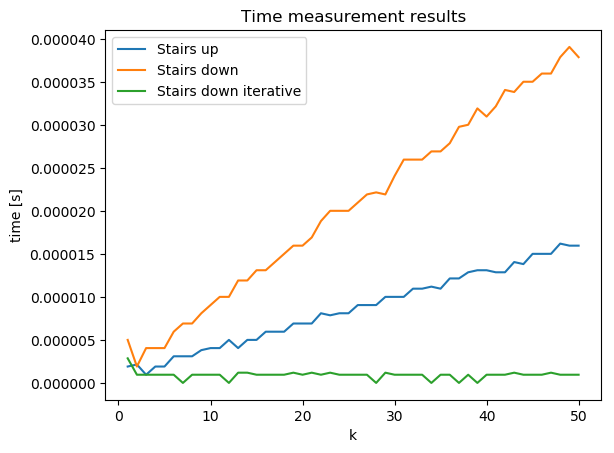

PyObject <matplotlib.legend.Legend object at 0x1293b1ad0>

In [17]:
test_time(1:50, k -> 1, k -> min(k + 1, 2))

### 4. Złota liczba
Założenie: przybliżanie $\displaystyle\phi = \frac{1+\sqrt{5}}{2}$

$$a_k=b_k=1$$

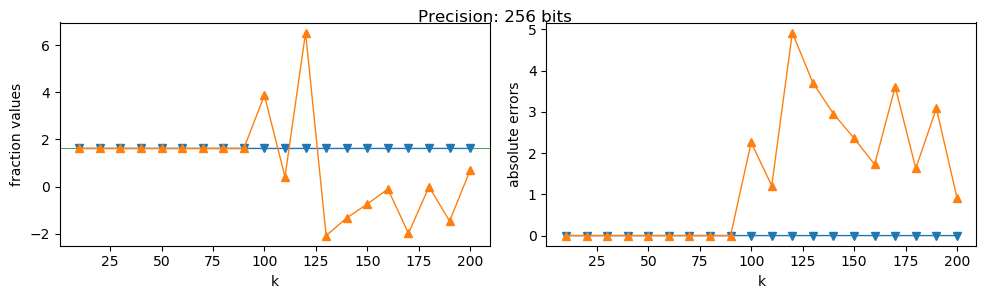

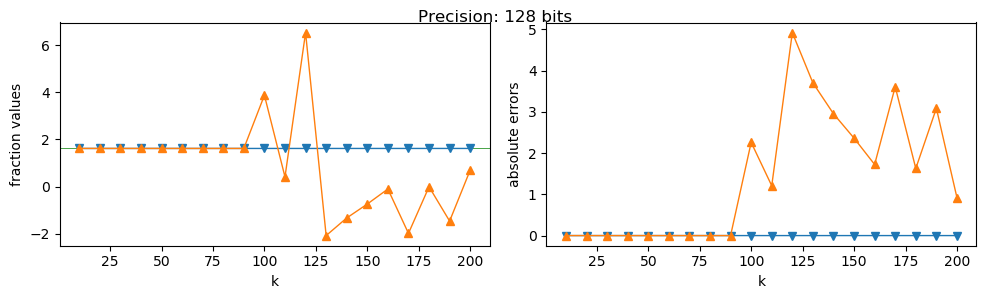

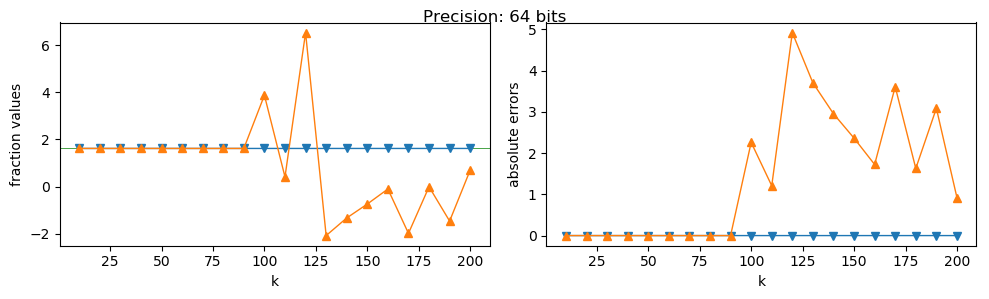

In [19]:
test_accuracy([256, 128, 64], 10:10:200, k -> 1, k -> 1, (1 + sqrt(5)) / 2)

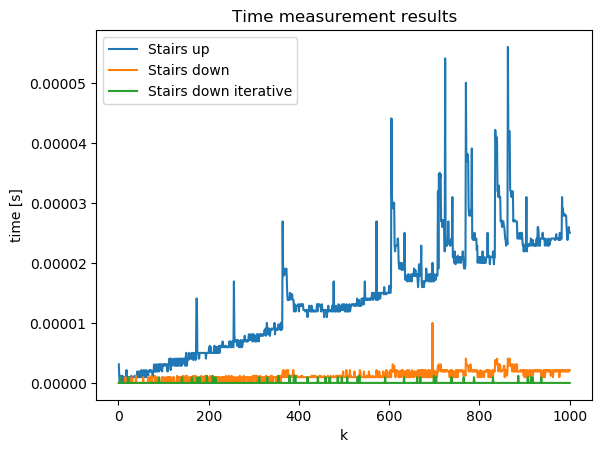

PyObject <matplotlib.legend.Legend object at 0x129e84110>

In [11]:
test_time(1:1000, k -> 1, k -> 1)